<a href="https://colab.research.google.com/github/Martinmbiro/Pytorch-computer-vision-basics/blob/main/01%20Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
> Since we're working on a computer vision problem, there's a few base computer vision libraries in `PyTorch` that's required, as discussed below:


> ✋ **Info**
+ [`torchvision`](https://pytorch.org/vision/stable/index.html#torchvision) - Consists of popular datasets, model architectures, and common image transformations for computer vision
+ [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html#datasets) - Contains built-in datasets and data loading functions for computer vision tasks
+ [`torchvision.models`](https://pytorch.org/vision/stable/models.html#models-and-pre-trained-weights) - contains definitions of models and pre-trained parameters
+ [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images) - Contains computer vision transformations used to transform or augment data for training or inference of different tasks
+ [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) -  abstract class representing a `Dataset`
+ [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) -  Combines a dataset and a sampler, and provides an iterable over the given dataset

> 📔 **Note**
+ All `torchvision.dataset` are subclasses of `torch.utils.data.Dataset` i.e, they have `__getitem__` and `__len__` methods implemented
+ We can index `Datasets` manually like a `list`: `training_data[index]` -> `(Xi, yi)` -> `(image, target)`
+ Grayscale images like the ones we have here have `1` colour channel

In [ ]:
# imports
import torch, torchvision, numpy as np, matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

# print torch version
print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

torch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


## **Getting the data**
> Here, we'll get the dataset from [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST) and later visualize it

In [ ]:
# train data
train_data = datasets.FashionMNIST(
    root='data',
    train=True, # train data = yes
    download=True,
    transform=ToTensor()
)

# test_data
test_data = datasets.FashionMNIST(
    root='data',
    train=False, # train data = no
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 310kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.56MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.86MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### Explore various data properties
> Become one with the data

In [ ]:
# structure of test & train data
print(train_data)
print('\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
# check length of train and test sets
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# class names
print(train_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# class and indices
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# get random image shape and class
image, label = train_data[5854]

# print
print(f'Image shape: {image.shape}') # Colour channel, Height, Width
print(f'Image label: {train_data.classes[label]}')

Image shape: torch.Size([1, 28, 28])
Image label: Coat


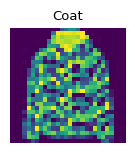

In [ ]:
# plot the image
plt.figure(figsize=(1.5, 1.5))
plt.axis(False)
plt.title(f'{train_data.classes[label]}', fontsize=9.5)
plt.imshow(image.squeeze())
plt.show()

### Visualize random data samples
> ✋ **Info**
+ [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow) - Is used to display data as an image, i.e., on a 2D regular raster
+ We'll use [`numpy.random.randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to generate random indices
+ [`matplotlib.figure.Figure.add_subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_subplot.html) - Add an [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) to the `figure` as part of a subplot arrangement

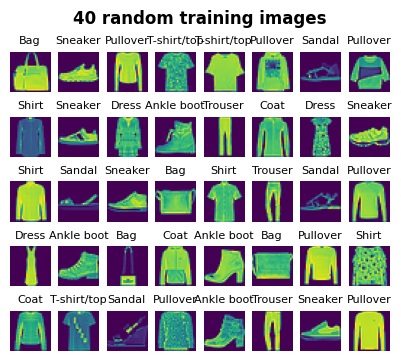

CPU times: user 1.67 s, sys: 139 ms, total: 1.81 s
Wall time: 1.67 s


In [ ]:
%%time
# random index
idx = np.random.randint(0, len(train_data), (1,)).item()
rows, cols = 5, 8
# define a figure
f = plt.figure(figsize=(6.0, 3.5), layout='compressed')

# loop
for i in range(1, rows*cols + 1):
  # random index
  idx = np.random.randint(0, len(train_data), (1,)).item()
  # random img and label
  img, lb = train_data[idx]

  f.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze())
  plt.title(f'{train_data.classes[lb]}', fontsize=8)
  plt.axis(False)

f.suptitle('40 random training images',
            weight='black')

plt.show()

### Visualize data across all classes
> ✋ **Info**
+ [`numpy.random.choice(a)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy-random-choice) - Generates a random sample from a given 1-D array, `a`
+ [`numpy.where(condition, [x, y, ]/)`](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy-where) - Returns elements chosen from `x` or `y` depending on condition
+ [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib-pyplot-subplots) - Creates a figure and a set of subplots
+ [`torch.Tensor.unique`](https://pytorch.org/docs/stable/generated/torch.Tensor.unique.html#torch-tensor-unique) - Returns the unique elements of a tensor

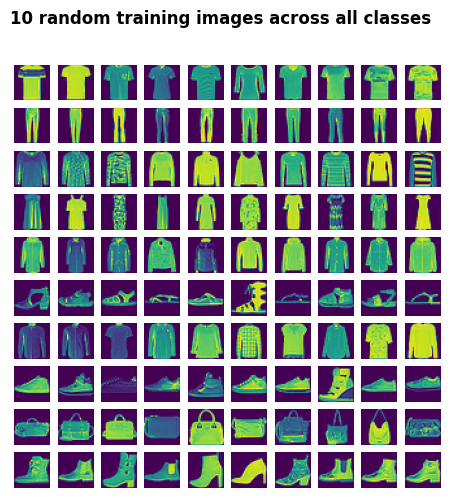

CPU times: user 1.78 s, sys: 125 ms, total: 1.91 s
Wall time: 1.78 s


In [ ]:
%%time
# create a figure with 10 rows * 10 columns
f, axs = plt.subplots(10, 10, figsize=(5.5, 5.5))

for i in train_data.targets.unique():
  # return an array of indexes where label == i
  img_idxs = np.where(train_data.targets == i)[0]

  for ax in axs[i]:
    # select a random index from img_indxs
    # pass it to train_data to return image at that index
    img, _ = train_data[np.random.choice(img_idxs)]
    ax.axis(False)
    ax.imshow(img.squeeze())

# suptitle
f.suptitle('10 random training images across all classes', weight='black')
plt.show()

## **Creating [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)s for train and test data**
> 🔔 **Recall**
+ The built-in `torch` [`Dataset`](https://pytorch.org/vision/stable/datasets.html)s are subclasses of [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)
+ [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) - Combines a `Dataset` and a sampler, and provides an iterable over the given dataset
+ `batch_size` is the number of training examples used in a single iteration of model training

In [ ]:
# import DataLoader
from torch.utils.data import DataLoader

# define mini-batch size / batch size
BATCH_SIZE = 32
# training Dataloader
train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

# test Dataloader
test_loader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

In [ ]:
# how many batches for each?
len(train_loader), len(test_loader)

(1875, 313)

In [ ]:
# explore one batch
x_tr_bch, y_tr_bch = next(iter(train_loader))
x_tr_bch.shape, y_tr_bch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# size of one batch:
len(x_tr_bch), len(y_tr_bch)

(32, 32)

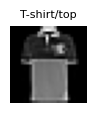

In [ ]:
# visualize random image from the batch
rand_idx = np.random.randint(0, len(x_tr_bch), (1,)).item()
img, lb = x_tr_bch[rand_idx], y_tr_bch[rand_idx]

plt.figure(figsize=(1.0,1.0))
plt.axis(False)
plt.title(train_data.classes[lb], fontsize=8)
plt.imshow(img.squeeze(), cmap='gray');

CPU times: user 975 ms, sys: 52.9 ms, total: 1.03 s
Wall time: 996 ms


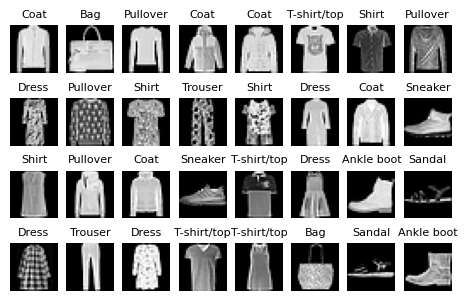

In [ ]:
%%time
# visualize all samples in batch
fig = plt.figure(figsize=(4.5,4.5), layout='compressed')
rows, cols = 4, 8 # 4*8 = 32 images

# loop
for i, x in enumerate(range(1, rows*cols + 1)):
  # get image and label
  img, lb = x_tr_bch[i], y_tr_bch[i]

  fig.add_subplot(rows, cols, x)
  plt.axis(False)
  plt.title(train_data.classes[lb], fontsize=8)
  plt.imshow(img.squeeze(), cmap='gray');

> ▶ **Up Next**
+ Training the data on a Multi-Layer Perceptron built with [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)